In [1]:
#This is a data visualization Project.
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
shoot_data = pd.read_csv('shootings.csv',)
print(shoot_data)

        id                name        date   manner_of_death       armed  \
0        3          Tim Elliot  2015-01-02              shot         gun   
1        4    Lewis Lee Lembke  2015-01-02              shot         gun   
2        5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed   
3        8     Matthew Hoffman  2015-01-04              shot  toy weapon   
4        9   Michael Rodriguez  2015-01-04              shot    nail gun   
...    ...                 ...         ...               ...         ...   
4890  5916     Rayshard Brooks  2020-06-12              shot       Taser   
4891  5925      Caine Van Pelt  2020-06-12              shot         gun   
4892  5918        Hannah Fizer  2020-06-13              shot     unarmed   
4893  5921      William Slyter  2020-06-13              shot         gun   
4894  5924      Nicholas Hirsh  2020-06-15              shot         gun   

       age gender      race           city state  signs_of_mental_illness  \
0     53.0

In [113]:
sns.set_style("white")
sns.set_palette("Set1")

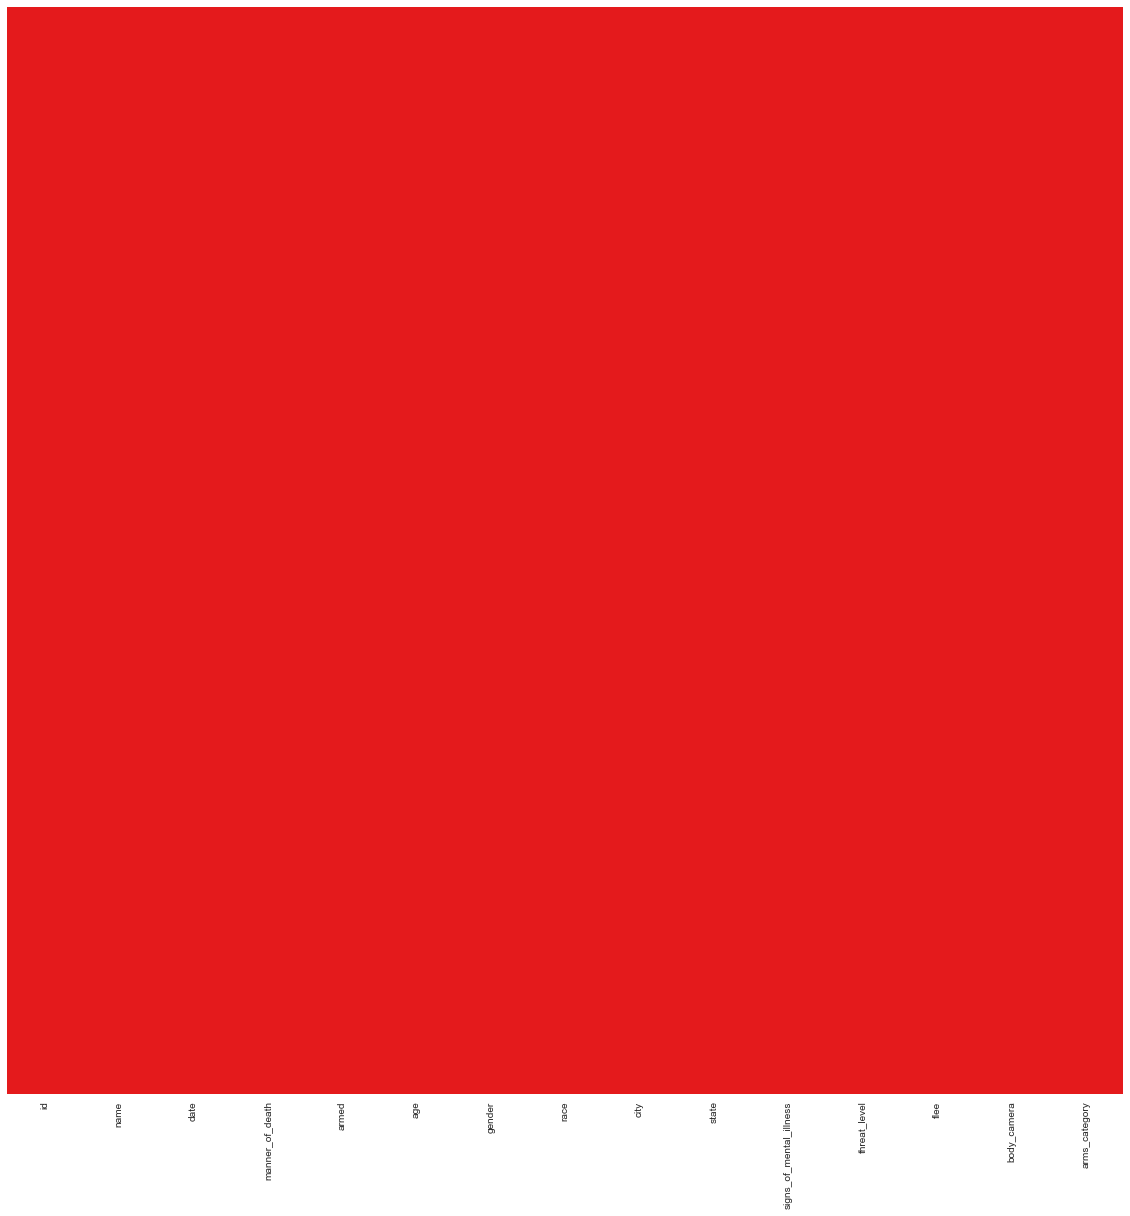

In [16]:
#plot heatmap to check null value number
plt.figure(figsize=(20,20))
sns.heatmap(data = shoot_data.isnull(),yticklabels=False,cbar=False,cmap = "Set1")

In [18]:
#word cloud to show which state has the most gunshot
from wordcloud import WordCloud

In [31]:
shoot_data['manner_of_death'].value_counts()

shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

In [40]:
list1 = shoot_data['state'].tolist()
str1 = ' '.join(list1)

In [74]:
wordcloud = WordCloud(width=480,height=480,margin=0,prefer_horizontal = 1,background_color="white",
             colormap="Set1",max_font_size=150,min_font_size=5,).generate(str1)

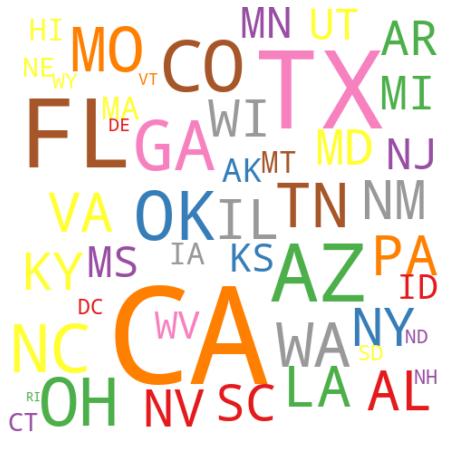

<Figure size 432x288 with 0 Axes>

In [272]:
# Display the generated image:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
plt.savefig("wordcloud.png")

In [78]:
import squarify as sq
#install needed

In [95]:
race = pd.DataFrame(shoot_data['race'].value_counts())
race

,race
White,2476
Black,1298
Hispanic,902
Asian,93
Native,78
Other,48


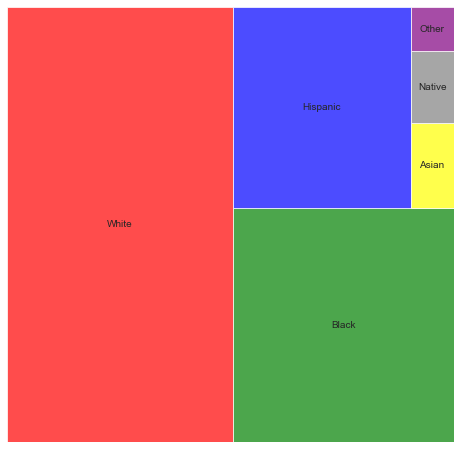

<Figure size 432x288 with 0 Axes>

In [273]:
plt.figure(figsize=(8,8))
sq.plot(sizes=race['race'],label=race.index,color = ["red","green","blue","yellow","grey","purple"],
       alpha = 0.7)
plt.axis('off')
plt.show()
plt.savefig("treemap.png")

In [103]:
sex = shoot_data['gender'].value_counts()

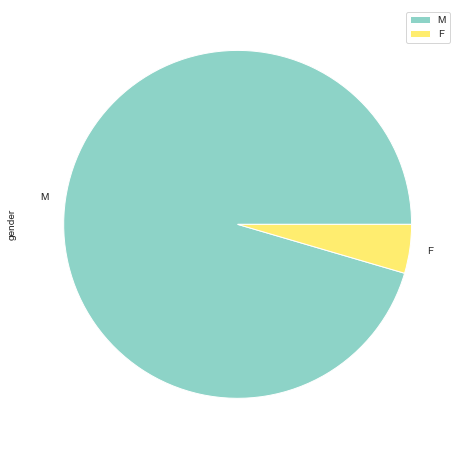

In [274]:
sex.plot(kind='pie',figsize=(8,8),legend = True,colormap = "Set3")
plt.savefig("pie_chart.png")

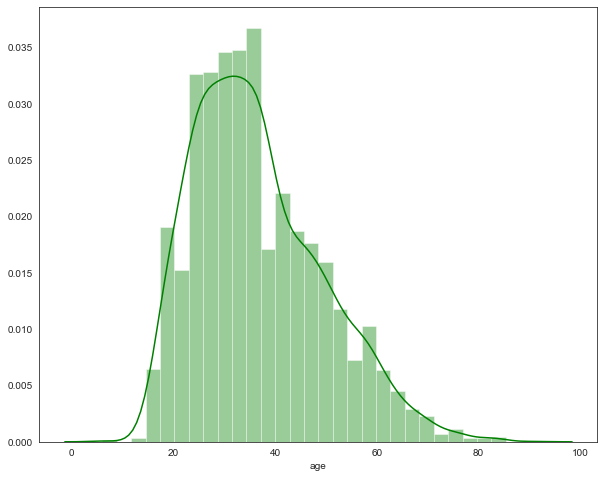

In [275]:
plt.figure(figsize = (10,8))
sns.distplot(shoot_data['age'],bins=30,color = "green",)
plt.savefig("distplot.png")

In [227]:
#use line plot to see the shot cases trend
date = pd.Series(shoot_data['date'].drop_duplicates())
case = shoot_data[['id','date']].groupby('date').count()
case.columns = ['case_count']

In [238]:
def year_month_label_generator(data):
    data['date'] = data.index
    data['year'] = 0
    data['month'] = 0
    for i in range(data.shape[0]):
        temp = data.iloc[i,1]
        data.iloc[i,2] = temp[0:4]
        if temp[5:7] == '01':
            data.iloc[i,3] = '01'
        elif temp[5:7] == '02':
            data.iloc[i,3] = '02'
        elif temp[5:7] == '03':
            data.iloc[i,3] = '03'
        elif temp[5:7] == '04':
            data.iloc[i,3] = '04'
        elif temp[5:7] == '05':
            data.iloc[i,3] = '05'
        elif temp[5:7] == '06':
            data.iloc[i,3] = '06'
        elif temp[5:7] == '07':
            data.iloc[i,3] = '07'
        elif temp[5:7] == '08':
            data.iloc[i,3] = '08'
        elif temp[5:7] == '09':
            data.iloc[i,3] = '09'
        elif temp[5:7] == '10':
            data.iloc[i,3] = '10'
        elif temp[5:7] == '11':
            data.iloc[i,3] = '11'
        else:
            data.iloc[i,3] = '12'
    return data
            

In [239]:
case_1 = year_month_label_generator(case)

In [240]:
case_2 = case_1.groupby(['year','month']).sum()

In [262]:
case_2['year'] = 0
case_2['month'] = 0
for i in range(case_2.shape[0]):
        case_2.iloc[i,1] = case_2.index[i][0]
        case_2.iloc[i,2] = case_2.index[i][1]

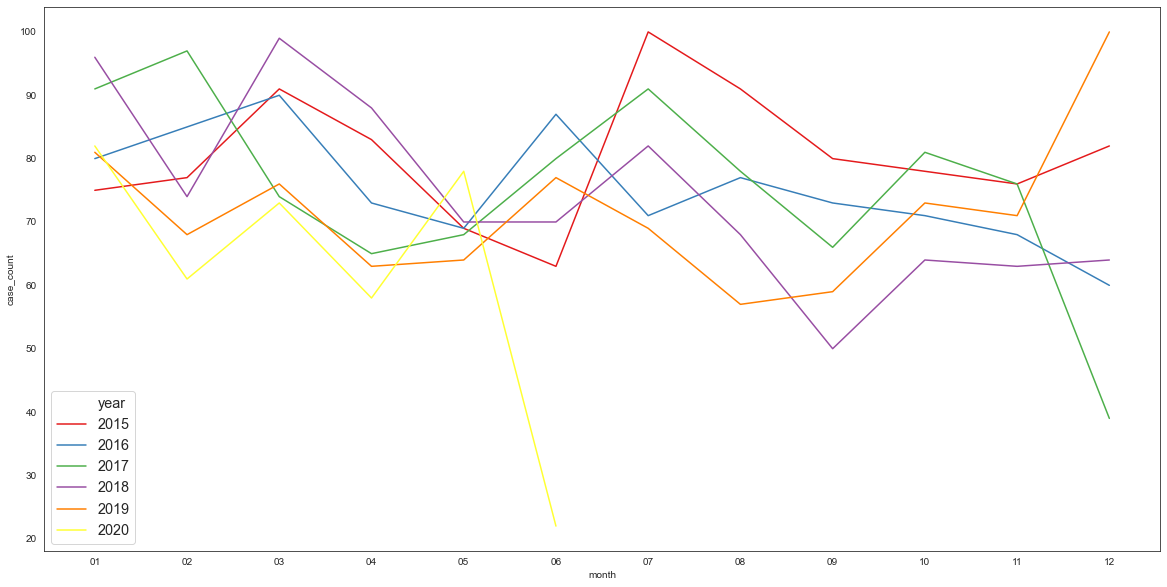

In [278]:
plt.figure(figsize=(20,10))
sns.lineplot(data=case_2,x='month',y = 'case_count',hue='year',palette = 'Set1',legend="full")
plt.legend(fontsize = "x-large")
plt.savefig("lineplot.png")